### Course: *DATA 1030* {-}

### Author: *Cheng Zeng* {-}

--------------------------------------------------------------------------------------------------------------

### Project description {-}

The final project aims to solve a regression problem. Given several features of a building, we hope to find a regression model which can predict the energy efficiency of it. The energy efficiency are described by two target variables names *heating load* and *cooling load*. It is important because it could help to design more environemntally friendly buildings from the theoretical perspective.  Real-life energy efficiency experiments of buidings could be both time and effort consuming. 
The final project in the github (see )

### Questions to be answered  {-}

* Regression questions 
    - Predict the heating load and cooling load of the building 
    - Estimate the importance of the features 

* Classification quesitons 
    - Convert the output variables into a high-level concept such as low-, medium- and high-enregy efficiency and predict what kind of buildings can be classified into certain groups. 
    
* Unsupervised quesitons 
    - Using the first nine features and group them into the similar buildings and test if buildings in the same cluster also performs similarly on the $10$ attribute 
    

\newpage

### Dataset {-}

The dataset if from [UCI energy efficiency](https://archive.ics.uci.edu/ml/datasets/Energy+efficiency). In this dataset, $\mathbf{768}$ simulation points are provided. $\mathbf{10}$ **numerical  attributes** are used to represent the main features of each building. 

#### Two related public projects  {-}



1. The first project related to the dataset is described in this work https://www.sciencedirect.com/science/article/pii/S037877881200151X. They collected the data by computational simulation of buildings which are assumed to be in Athens, Greece. Classical linear regression model is compared to a non-parametric non-linear model, random forest, to estimate and predict the heating and cooling loadings of the buildings.  

2. The second project lives in https://doi.org/10.1016/j.enbuild.2014.07.036, in which artificial neural network, support vector regression and ensemble inference models are employed and it concludes that the ensemble model displays superior performance than other existing models for this dataset. 

#### Attribute description  {-}

Of the $10$ attributes, $\mathbf{8}$ attributes serve as the dependent variables and the other $\mathbf{2}$ are response variables to be predicted. In the following table the $10$ features of the buildings, the number of possible values and the units/description are detailed. 

|Mathematical symbols | Attribute | # possible values | units/description | 
|:----:|:---:|:---:|:---:|
|X1|Relative compactness |12| absolute unit| 
|X2|Surface area |12| $m^2$ | 
|X3|Wall area |7| $m^2$ | 
|X4|Roof area |4| $m^2$ | 
|X5|Overall height |2| $m$ | 
|X6|Orientation |4| 2:North, 3:East, 4:South, 5:West | 
|X7|Glazing area |4| 0%, 10%, 25%, 40% (of floor area) |
|X8|Glazing area distribution|5| 0:Unknow, 1:Uniform, 2:North, 3:East, 4:South, 5:West |
|y1|Heating load|586|  kWh/m² |
|y2|Cooling load|636|  kWh/m² |

For the mathematical convention, $X$ is used to denote the input variables and $y$ is for output variables.
One thing to be noted it that it is not a real-life dataset. It comes from building simulations.  For more details of the data, please refer to the original work [energy efficiency analysis paper](https://www.sciencedirect.com/science/article/pii/S037877881200151X).

In [1]:
# Dataframe head  
import pandas as pd

file = '../data/raw/ENB2012_data.csv'
df = pd.read_csv(file)
print(df.shape)
df.head()

(768, 10)


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


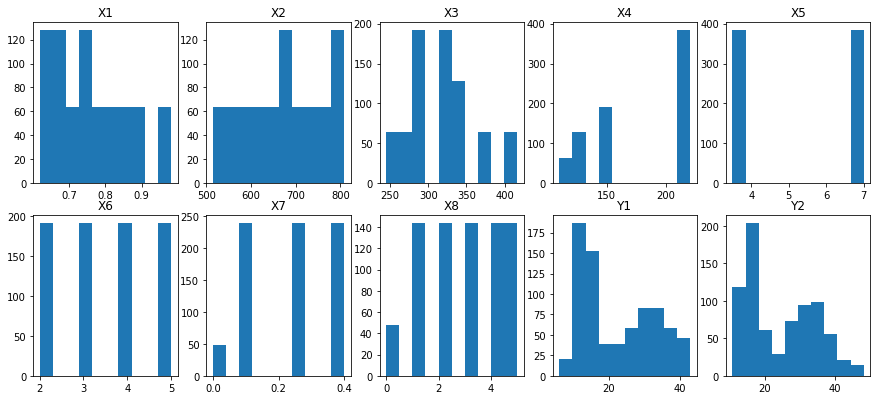

In [2]:
# The histograms of the ten numerical attributes
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,6.5))
for i, column in enumerate(df.columns):
    ax = plt.subplot(2,5,i+1)
    ax.hist(df[column]);
    ax.set_title(column)
plt.savefig("../figures/features_histogram.png")

\newpage

### Dataset preprocessing  {-}

The values in the original dataset are all numerical. It is fine if a regression is needed. As one can see from the description in the table, the more discrete like features such as **orientation**, **glazing area** and **glazing area distribution** are to be converted to categorical features when doing classification. 
As of now, the regression problem is firsly considered. Thus only scaling (and normalization) are applied in the preprocessing step.  Also note that we preprocess all points the dataset. In the following steps we are supposed to split the dataset to training, cross-validation and testing set. After preprocessing, still ten features are left. 

In [3]:
# Since all the continues features are bounded in certain range, we use the MinMaxScaler for the features to
# be proprocessed. Note that the values of feature "X1" and "X7" are already in the range of [0,1]
# no proprocessing is needed for these two featurs. 
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [4]:
minmax_scaler = MinMaxScaler()
columns_minmax = ['X2','X3','X4','X5','X6','X8','Y1','Y2']
minmax_scaler.fit(df[columns_minmax])
df[columns_minmax] = minmax_scaler.transform(df[columns_minmax])
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,0.000000,0.285714,0.000000,1.0,0.000000,0.0,0.0,0.257212,0.280905
1,0.98,0.000000,0.285714,0.000000,1.0,0.333333,0.0,0.0,0.257212,0.280905
2,0.98,0.000000,0.285714,0.000000,1.0,0.666667,0.0,0.0,0.257212,0.280905
3,0.98,0.000000,0.285714,0.000000,1.0,1.000000,0.0,0.0,0.257212,0.280905
4,0.90,0.166667,0.428571,0.111111,1.0,0.000000,0.0,0.0,0.399838,0.468085


In [5]:
df.to_csv("../data/processed/df_processed.csv")